In [1]:
###################### Install all necessary libraries #########################

from google.colab import files
!pip install praw -q
!pip install yfinance --upgrade --no-cache-dir -q
!pip install yahoo_fin -q
!pip install yahoo_fin --upgrade -q
!pip install requests_html -q
!pip install mpld3 -q
!pip install fastapi -q

################################################################################

     |████████████████████████████████| 133kB 8.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


In [2]:
#########################################  DATA REQUESTS #############################################

# To provide current date and time in an format understandable by our API
from datetime import datetime
from datetime import timedelta

##########################################  DATA MINING ##############################################

import DataMining as get_data
from yahoo_fin.stock_info import get_data as get_val

#######################################  DATA MANIPULATION ###########################################

import pandas as pd
import AnalyzePosts as analyze

#######################################  DATA VISUALIZATION ###########################################

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from plotly.graph_objs import Scatter3d, Layout, Scene
import plotly


#######################################################################################################


In [3]:
def CombinedAnalysis_Stocks(stocks, amt, time):
    """
    Get the line plots of top ```amt``` treding stocks for the last ```time``` days.  

    Parameters
    ----------
    stocks : pd.DataFrame
    amt    : int
    time   : int

    Returns
    -------
    Graphs
    """
    ######################## Get the Top ```amt``` values ######################

    try:
      top_stocks = stocks.sort_values('Number_Of_Occurences', ascending=False).head(amt)
    except:
      top_stocks = stocks
    
    ############################ Collect Data and Plot #########################
    
    # Create an empty data Frame to store retreived data
    data_stock = pd.DataFrame(columns=top_stocks.columns)

    for tick in top_stocks['Ticker']:
      tick = tick.replace(" ","")
      try:
        
        # Collect data from yahoo finance function get_data using the stock ticker
        # Use pd.concat to store all data in one DataFrame
        data_stock = pd.concat([get_val(tick,
                              datetime.now() - timedelta(days=time),
                              datetime.date(datetime.now()), 
                              index_as_date=True),data_stock],
                            axis = 0)
      
      except:
        pass
    
    # Plot the line graph of all the stocks togather
    fig = px.line(data_stock, 
                  x=data_stock.index, 
                  y=data_stock['close'], 
                  color="ticker")
    
    fig.update_traces(mode="markers+lines")
    fig.update_xaxes(title="Date")
    fig.update_layout(
        hoverlabel=dict(
          bgcolor="white",
          font_size=16,
          font_family="Rockwell"
          )
    ) 
    plotly.offline.plot(fig, filename='AnalyzeStocks.html')
    # Display result (graph)
    fig.show()
    
    ############################################################################

In [4]:
def Stocks_linePlots(stocks, amt, time):
    """
    Get the line plots of top ```amt``` treding stocks for the last ```time``` days.
    Parameters
    ----------
    stocks : pd.DataFrame
    amt    : int
    time   : int
    Returns
    -------
    Graphs
    """
    ######################## Get the Top ```amt``` values ######################

    try:
        top_stocks = stocks.sort_values('Number_Of_Occurences', ascending=False).head(amt)
    except:
        top_stocks = stocks

        ############################ Collect Data and Plot #########################

    for tick in top_stocks['Ticker']:
        tick = tick.replace(" ", "")
        try:
            # Collect data from yahoo finance function get_data using the stock ticker
            data_stock = get_val(tick,
                                  datetime.now() - timedelta(days=time),
                                  datetime.date(datetime.now()),
                                  index_as_date=True)

            # Start plotting the line graph in plotly.express
            fig = px.line(data_stock,
                          x=data_stock.index,
                          y=data_stock['close'],
                          color="ticker")

            fig.update_traces(mode="markers+lines")
            fig.update_layout(
                hoverlabel=dict(
                    bgcolor="white",
                    font_size=16,
                    font_family="Rockwell"
                ),
                title = tick
            )
            fig.update_xaxes(title=tick)
            plotly.offline.plot(fig, filename='Stocks_linePlots.html')
            # ret_Graph('./IndividualLine.html')
            # Display the result (graph)
            fig.show()
        except:
            pass

    ############################################################################

In [5]:
def Stocks_candlePlots(stocks, amt, time):
    """
    Get the plots of top ```amt``` treding stocks for the last ```time``` days.
    Parameters
    ----------
    stocks : pd.DataFrame
    amt    : int
    time   : int
    Returns
    -------
    Graphs
    """
    ######################## Get the Top ```amt``` values ######################

    try:
        top_stocks = stocks.sort_values('Number_Of_Occurences', ascending=False).head(amt)
    except:
        top_stocks = stocks

    ############################ Collect Data and Plot #########################

    for tick in top_stocks['Ticker']:
        tick = tick.replace(" ", "")
        try:
            # Collect data from yahoo finance function get_data using the stock ticker
            df = get_val(tick,
                          datetime.now() - timedelta(days=time),
                          datetime.date(datetime.now()),
                          index_as_date=True)

            # Start plotting the graphs in plotly.graph.objects
            fig = go.Figure(data=[go.Candlestick(x=df.index,
                                                 open=df['open'],
                                                 high=df['high'],
                                                 low=df['low'],
                                                 close=df['close'])])

            fig.update_layout(
                yaxis_title=tick,
                xaxis_title='Date',
                title = tick
            )
            plotly.offline.plot(fig, filename='Stocks_candlePlots.html')
            # ret_Graph('./IndividualAnalysis.html')
            # Display the result
            fig.show()

        except:
            pass

    ############################################################################

In [6]:
def Popular_Crypto(crypto_data, amt):
    """
    Get the growth rate of most popular ```amt``` crypto's in the last 24h and plot their graphs
    Parameters
    ----------
    crypto_data : pd.DataFrame
    amt         : int
    Returns
    -------
    Graph
    """
    ############################ Collect Data Req ##############################

    popular_crypto_data = crypto_data.sort_values('volume_24', ascending=False).head(amt)

    ################################## Plot 1 ##################################

    ax = plt.subplots(figsize=(13, 7))
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(data=popular_crypto_data,
                x=popular_crypto_data['Name'],
                y=popular_crypto_data['percent_change_24h'],
                palette="Blues_d",
                label="percent_change_24h")
    plt.xticks(rotation='vertical')
    plt.title('Most Popular Crypto')

    # Display the result
    plt.show()

    ############################################################################

In [7]:
def Growing_Crypto(crypto_data, amt, period):
    """
    Get the top ```amt``` crypto with maximum growth in the last 24h and plot their graphs
    Parameters
    ----------
    crypto_data : pd.DataFrame
    amt         : int
    period      : int
    Returns
    -------
    Graphs
    """
    ########################### Collect Data Req ###############################

    top_crypto_data = crypto_data.sort_values('percent_change_24h' if period == 24 else 'percent_change_7d',
                                              ascending=False).head(amt)

    ################################# Plot 1 ###################################
    f, ax = plt.subplots(figsize=(13, 7))

    if period == 24:
        sns.barplot(data=top_crypto_data,
                    x=top_crypto_data['Name'],
                    y=top_crypto_data['percent_change_24h'],
                    palette="gist_earth",  # YlOrRd_r
                    label="percent_change_24h")
    else:
        sns.barplot(data=top_crypto_data,
                    x=top_crypto_data['Name'],
                    y=top_crypto_data['percent_change_7d'],
                    palette="gist_earth",  # YlOrRd_r
                    label="percent_change_7d")

    plt.xticks(rotation='vertical')
    plt.title('Most Growing Crypto\'s')
    ax.legend(fontsize=14)

    ################################# Plot 2 ###################################

    if period == 24:
        fig = px.bar(top_crypto_data, x='Name', y='percent_change_24h',
                     hover_data=['Name', 'percent_change_24h', 'Price', 'Circulating_Supply', 'Trading_Volume',
                                 'volume_24'],
                     color='Name',
                     labels={'pop': 'Crypto Currencies'},
                     height=500,
                     template='ggplot2', title='Top Crypto\'s')
    else:
        fig = px.bar(top_crypto_data, x='Name', y='percent_change_7d',
                     hover_data=['Name', 'percent_change_7d', 'Price', 'Circulating_Supply', 'Trading_Volume',
                                 'volume_24'],
                     color='Name',
                     labels={'pop': 'Crypto Currencies'},
                     height=500,
                     template='ggplot2', title='Most Growing Crypto\'s')
    plotly.offline.plot(fig, filename='Growing_Crypto.html')
    # ret_Graph('./topCrypto.html')
    return fig.show()

    ############################################################################

In [8]:
def Growing_Crypto_Investable(crypto_data, amt, period):
    """
    Get the top ```amt``` crypto with maximum growth in the last 24h and plot their graphs
    Parameters
    ----------
    crypto_data : pd.DataFrame
    amt         : int
    period      : int
    Returns
    -------
    Graphs
    """
    ########################### Collect Data Req ###############################

    top_crypto_data = crypto_data.sort_values('percent_change_24h' if period == 24 else 'percent_change_7d',
                                              ascending=False).head(amt)

    ################################# Plot 1 ###################################
    f, ax = plt.subplots(figsize=(13, 7))

    if period == 24:
        sns.barplot(data=top_crypto_data,
                    x=top_crypto_data['Name'],
                    y=top_crypto_data['percent_change_24h'],
                    palette="gist_earth",  # YlOrRd_r
                    label="percent_change_24h")
    else:
        sns.barplot(data=top_crypto_data,
                    x=top_crypto_data['Name'],
                    y=top_crypto_data['percent_change_7d'],
                    palette="gist_earth",  # YlOrRd_r
                    label="percent_change_7d")

    plt.xticks(rotation='vertical')
    plt.title('Growing and Investable Crypto\'s')
    ax.legend(fontsize=14)

    ################################# Plot 2 ###################################

    if period == 24:
        fig = px.bar(top_crypto_data, x='Name', y='percent_change_24h',
                     hover_data=['Name', 'percent_change_24h', 'Price', 'Liquidity', 'Circulating_Supply',
                                 'Trading_Volume', 'volume_24'],
                     color='Name',
                     labels={'pop': 'Crypto Currencies'},
                     height=500,
                     template='ggplot2', title='Top Crypto\'s')
    else:
        fig = px.bar(top_crypto_data, x='Name', y='percent_change_7d',
                     hover_data=['Name', 'percent_change_7d', 'Price', 'Liquidity', 'Circulating_Supply',
                                 'Trading_Volume', 'volume_24'],
                     color='Name',
                     labels={'pop': 'Crypto Currencies'},
                     height=500,
                     template='ggplot2', title='Growing and Investable Crypto\'s')
    plotly.offline.plot(fig, filename='Growing_Crypto_Investable.html')
    # ret_Graph('./bestCrypto.html')
    fig.show()

    ############################################################################

In [9]:
def Analyze_Crypto_Data(liquidable, time):
    """
    Represent the Top Most Promising Cryptos in a 3d scatter plot.
    Parameters
    ----------
    liquidable : pd.DataFrame
    time       : int

    Returns
    -------
    Graph
    """
    ############################ Get the Data we require #######################

    liquidable = liquidable.sort_values('percent_change_24h' if time == 24 else 'percent_change_7d',
                                        ascending=False).head(20)

    ############################### Plot 1 #####################################

    fig = px.scatter_3d(liquidable,
                        x='Price',
                        y='Circulating_Supply',
                        z='percent_change_24h' if time == 24 else 'percent_change_7d',
                        color='Name',
                        opacity=0.8,
                        hover_data=['Name', 'Price'],
                        size='Liquidity',
                        title="Most Promising Crypto Currencies",
                        )
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), template="plotly_dark")
    plotly.offline.plot(fig, filename='my3Dplot1.html')
    # ret_Graph('./my3Dplot1.html')
    fig.show()

    ################################ Plot 2 ####################################

    percent_change, Circulating_Supply, Price = liquidable.percent_change_24h if time == 24 else liquidable.percent_change_7d, liquidable.Circulating_Supply, liquidable.Price

    layout = Layout(scene=Scene(
        xaxis={'title': 'Price'},
        yaxis={'title': 'Circulating Supply'},
        zaxis={'title': 'percent_change'}))

    fig = go.Figure(data=[go.Scatter3d(
        x=Price,
        y=Circulating_Supply,
        z=percent_change,
        mode='markers',
        marker=dict(
            size=8,
            color=Price,
            colorscale='Viridis',
            opacity=0.5
        )
    )], layout=layout)
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    plotly.offline.plot(fig, filename='my3Dplot2.html')
    # ret_Graph('./my3Dplot2.html')
    fig.show()

    ############################################################################

In [10]:
def Analyze_Stocks_Posts(data, parm1, parm2, parm3):
    """
    Plot the effect of social media post using the parameters ```parm1```, ```parm2```, and ```parm3```.
    We use px.scatter_3d() to get the 3-Dimensional Visualization of the growth rate of stocks with
    respect to the number of occurences / number of upvotes.
    Parameters
    ----------
    data  : pd.DataFrame
    parm1 : str
    parm2 : str
    parm3 : str
    Returns
    -------
    Graph
    """
    ################################# Plot 1 ###################################
    fig = px.scatter_3d(data.head(10), 
                        x=parm1, 
                        y=parm2, 
                        z=parm3,
                        color=parm2, 
                        opacity=0.8,
                        hover_data = ['Name','Price'], 
                        title = "Most Promising Crypto Currencies",
    )
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), template = "plotly_dark")
    fig.show()
    
    ############################################################################

In [11]:
def Analyze_Crypto_Posts(data, parm1, parm2, parm3):
    """
    Plot the effect of social media post using the parameters ```parm1```, ```parm2```, and ```parm3```.
    We use px.scatter_3d() to get the 3-Dimensional Visualization of the growth rate of cryptos with
    respect to the number of occurences / number of upvotes.
    Parameters
    ----------
    data  : pd.DataFrame
    parm1 : str
    parm2 : str
    parm3 : str
    Returns
    -------
    Graph
    """
    ################################# Plot 1 ###################################

    fig = px.scatter_3d(data.head(10),
                        x=parm1,
                        y=parm2,
                        z=parm3,
                        color=parm2,
                        opacity=0.8,
                        hover_data=['Name', 'Price', 'percent_change_24h'])
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), template="plotly_dark")
    plotly.offline.plot(fig, filename='Reddit_Crypto.html')
    fig.show()

    ############################################################################

# Stocks Analysis

In [12]:
############################ Establish credentials #############################

# Reddit
client_id, client_secret = 'jA6tGV9IbyEDxg', 'ku7t8VHg5vtp3JMGjuqJmE5ybQhBxA'
username, password = '-betrayer', 'NarutoUzamaki$$$'

# Twitter 
consumer_key, consumer_secret = '02tFL0DX18rEZN43uV9iCWr6E', 'Bx3xDbD3a9fuP5Kv90ZGHD5amoJXAhF3l5sEElnp6H4esWDk1e'
access_key, access_secret = '1189932019243003904-85tElnlmswS7Of3dkiIzdImn2J4xiA', '6xt9bsQxlxyBUnR2p71mYYbZ42nDJK7TWCQPeAtsIL5zj'

################################################################################

In [13]:
######################## Get Posts and Tweets for stocks #######################

# Retreive posts from reddit for stocks
reddit_posts = pd.DataFrame()
subreddits_stocks = ["wallstreetbets", "stocks", "investing", "securityanalysis"]
for subreddit in subreddits_stocks:
    new_data = get_data.Reddit_API(client_id, client_secret, username, password, subreddit, 10000)
    reddit_posts = reddit_posts.append(new_data)

# Retreive tweets from twitter 
df_tweets = get_data.getTweets(consumer_key, consumer_secret, access_key, access_secret, hashtags="#stocks OR #StockToBuy OR #trading OR #stockmarket OR #investing", target_date='2021-04-30', total_tweets = 2500, attempts = 1)

################################################################################

In [14]:
############################### Retreive Stocks Info ###########################
 
stocks = get_data.stocks()
common_words = get_data.Common_words()
top_gainers_today = get_data.Gainers_Or_Losers(1)
top_gainers_today.rename(columns={'ticker': 'Ticker'}, inplace=True)

################################################################################

In [15]:
####################### Analyze Reddit Posts and Tweets ########################

Analysis_reddit = analyze.Analyze_Reddit_Posts(stocks, reddit_posts, common_words)
Analysis_tweets = analyze.Analyze_tweets(stocks,df_tweets, common_words)
Analysis_tweets = Analysis_tweets.sort_values('Number_Of_Occurences', ascending=False)
index_names = Analysis_tweets[(Analysis_tweets['Number_Of_Occurences'] >= 10)].index
Analysis_tweets.drop(index_names, inplace = True)

################################################################################

In [16]:
########################## Data Visualization ##################################

# Result of Reddit 
CombinedAnalysis_Stocks(Analysis_reddit, 20, 365)
Stocks_candlePlots(Analysis_reddit, 10, 365)

# 3D projection of relation between Occurences / Upvotes vs Price 
# Analyze_Stocks_Posts(Analysis_reddit, 'Price', 'Total_Upvotes', 'Number_Of_Occurences')

# 3D projection of relation between Occurences / Retweets vs Price 
# Analyze_Stocks_Posts(Analysis_tweets, 'Price', 'Total_Retweets', 'Number_Of_Occurences')


In [17]:
# Result of Twitter
CombinedAnalysis_Stocks(Analysis_tweets, 20, 365)
Stocks_candlePlots(Analysis_tweets, 20, 365)

In [18]:
# Result of Market Performance
CombinedAnalysis_Stocks(top_gainers_today, 20, 365)
Stocks_candlePlots(top_gainers_today, 20, 365)

# CRYPTO'S

In [19]:
######################## Get Posts and Tweets for cryptos ######################

# Retreive posts from reddit for crypto
reddit_crypto = pd.DataFrame()
subreddits_crypto = ["Bitcoinmarkets", "Ethfinance", "CryptoMarkets", "CryptoCurrencyTrading", "ethtrader",
                     "Cryptocurrency", "Crypto_Currency_News"]
for subreddit in subreddits_crypto:
    new_data = get_data.Reddit_API(client_id, client_secret, username, password, subreddit, 10000)
    reddit_crypto = reddit_crypto.append(new_data)
df_tweets_crypto = get_data.getTweets(consumer_key, consumer_secret, access_key, access_secret, hashtags="#crypto OR #cryptocurrency OR #blockchain OR #bitcoin OR #ethereum", target_date='2021-05-2', total_tweets = 2500, attempts = 1)

################################################################################

In [20]:
############################## Get Crypto rates ################################

crypto_data = get_data.CoinBase_Api()
crypto_data = crypto_data[crypto_data.Circulating_Supply > 0]
crypto_data = crypto_data[crypto_data.volume_24 > 200000]
liquidable = get_data.crypto_liquidity(crypto_data)

################################################################################

In [21]:
####################### Analyze Reddit Posts and Tweets ########################

RedditCrypto_Analysis = analyze.Analyze_Reddit_Crypto(crypto_data, reddit_crypto, common_words)
RedditCrypto_Analysis = RedditCrypto_Analysis.sort_values('Number_Of_Occurences', ascending=False)
RedditCrypto_Analysis = pd.merge(left=crypto_data, right=RedditCrypto_Analysis, how='left', left_on='Name', right_on='Name')

tweets_crypto = analyze.Analyze_Tweets_Crypto(crypto_data, df_tweets_crypto, common_words)
tweets_crypto = pd.merge(left=crypto_data, right=tweets_crypto, how='left', left_on='Name', right_on='Name')

################################################################################

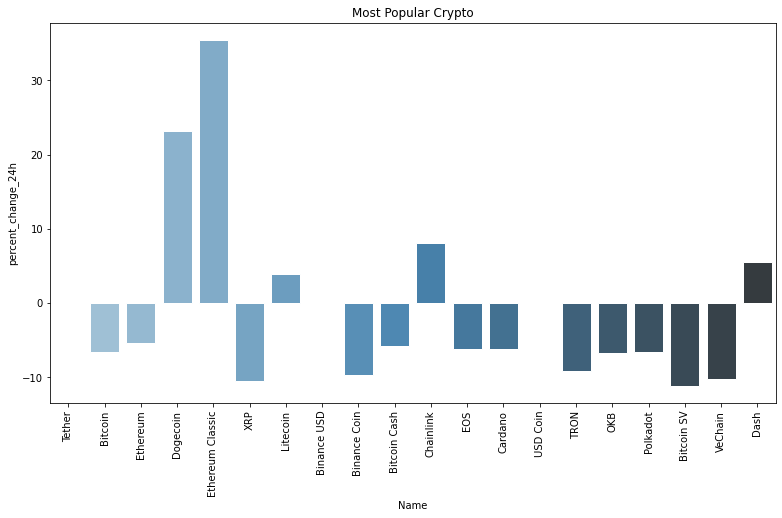

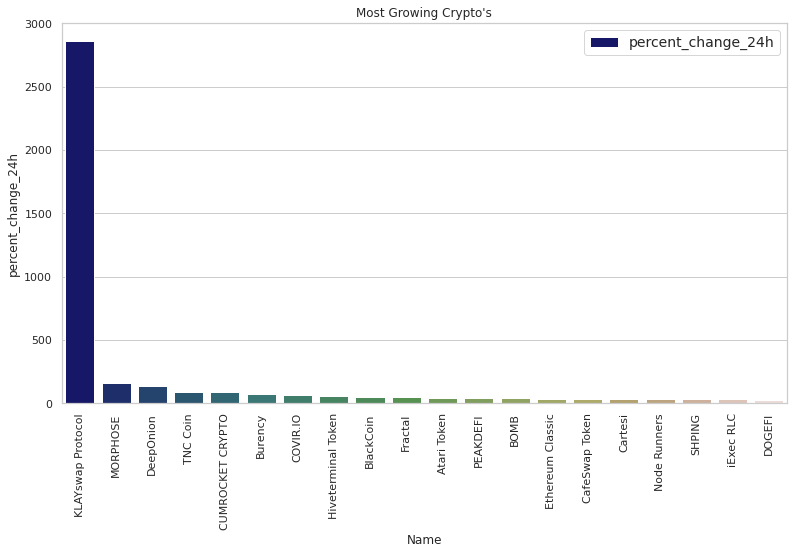

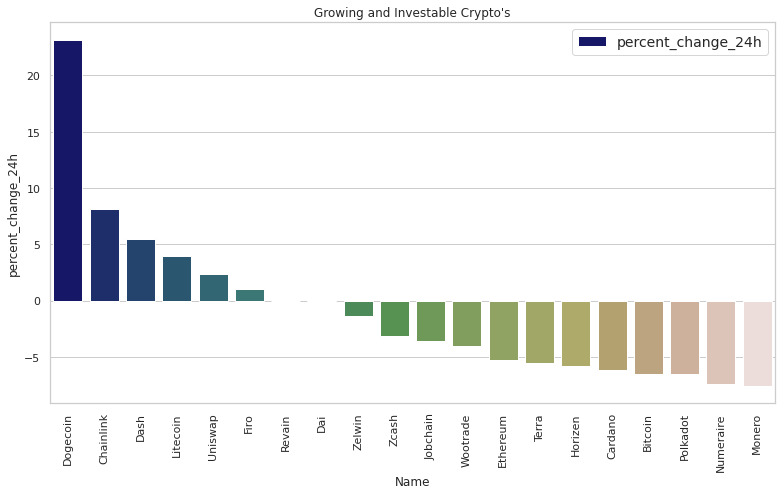

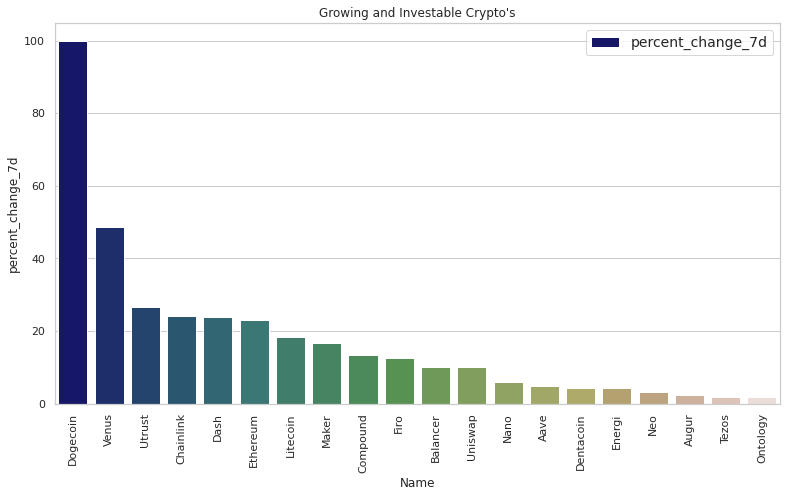

In [22]:
######################### Plot Graphs for Crpyto Analysis #######################

Popular_Crypto(crypto_data=crypto_data, amt=20)
Growing_Crypto(crypto_data=crypto_data, amt=20, period=24)


# Best Crypto's available with highest growth rate in last 24 hours 
Growing_Crypto_Investable(liquidable, 20, 24)

# Best Crypto's available with highest growth rate in last 7 days 
Growing_Crypto_Investable(liquidable, 20, 7)



################################################################################



## 3-D Graphs

In [23]:
# Analyze General Crypto Data
Analyze_Crypto_Data(liquidable, 7)

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:494: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene




In [24]:
# Analyze Crypto's based on Reddit Posts
Analyze_Crypto_Posts(RedditCrypto_Analysis, 'Price', 'Total_Upvotes', 'Number_Of_Occurences')

In [25]:
# Analyze Crypto's based on Tweets 
Analyze_Crypto_Posts(tweets_crypto, 'Price', 'Total_Retweets', 'Number_Of_Occurences')